_Lambda School Data Science_

# Make explanatory visualizations




Tody we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

In [1]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

What makes this visualization good?
*   Tells a story well, uncluttered
*    Clean, Easy to read
*    Ink to data ratio
*    Effective visualization uses annotations, but does not overwhelm viewer
*    Bring the insight to the audience


Above is a good example of one dimensional data

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Objectives
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

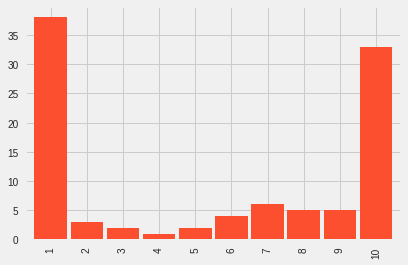

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

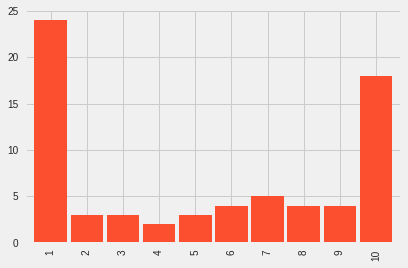

In [5]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

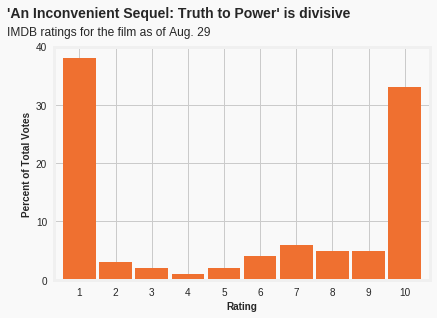

In [36]:
plt.style.use('fivethirtyeight')
fig = plt.figure()
fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

ax = fake.plot.bar(color='#ef7030', width=0.9)

ax.set(yticks=range(0, 50, 10),
       facecolor='#f9f9f9')

fig.patch.set_facecolor('#f9f9f9')

plt.ylabel('Percent of Total Votes', fontsize=10, fontweight='bold')
plt.xlabel('Rating', fontsize=10, fontweight='bold')

ax.text(x=-2, y=45, s="'An Inconvenient Sequel: Truth to Power' is divisive",
       fontsize=14, fontweight='bold')
ax.text(x=-2, y=42, s="IMDB ratings for the film as of Aug. 29",
       fontsize=12)
ax.tick_params(labelrotation=0)

## Reproduce with real data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [8]:
df.shape

(80053, 27)

In [0]:
df.columns

# To set up max display
pd.set_option('display.max_columns', 500)

In [0]:
# To sample one row randomly
df.sample(1).T

In [63]:
df.dtypes

timestamp       object
respondents      int64
category        object
link            object
average        float64
mean           float64
median           int64
1_votes          int64
2_votes          int64
3_votes          int64
4_votes          int64
5_votes          int64
6_votes          int64
7_votes          int64
8_votes          int64
9_votes          int64
10_votes         int64
1_pct          float64
2_pct          float64
3_pct          float64
4_pct          float64
5_pct          float64
6_pct          float64
7_pct          float64
8_pct          float64
9_pct          float64
10_pct         float64
dtype: object

In [0]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [12]:
df['timestamp'].describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [0]:
df.set_index('timestamp', inplace=True)

In [0]:
# filtering down to a specific date 
df['2017-08-29']

In [15]:
# Select the right category, lots to choose from in this DS
df['category'].value_counts()

US users              4216
Females               4216
Females Aged 30-44    4216
Females Aged 45+      4216
Aged 30-44            4216
Females Aged 18-29    4216
Aged 18-29            4216
Aged 45+              4216
Males Aged 45+        4216
IMDb staff            4216
Males under 18        4216
IMDb users            4216
Non-US users          4216
Males Aged 18-29      4216
Males                 4216
Males Aged 30-44      4216
Aged under 18         4216
Top 1000 voters       4216
Females under 18      4165
Name: category, dtype: int64

In [0]:
# Assigning a var to a date
lastday = df['2017-08-29']

In [0]:
# specifying category (like when i did USA)
lastday[lastday['category'] == 'IMDb users']

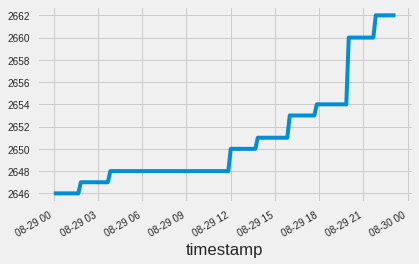

In [22]:
# This plot is telling us that people mostly vote in the evening
lastday[lastday['category'] == 'IMDb users'].respondents.plot();

In [0]:
# Specifying exactly what I am looking for (like on previous test)
final = lastday[lastday['category'] == 'IMDb users'].tail(1)

In [25]:
final

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [26]:
# The 10 columns we actually want
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns]

,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,
2017-08-29 23:10:06.218251,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
# Pulled out the final cols we care about
data = final[pct_columns].T
data.index = range(1, 11)

<Figure size 432x288 with 0 Axes>

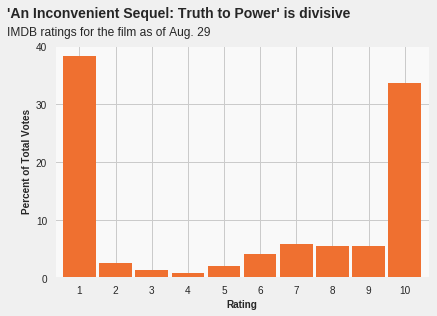

In [32]:
plt.style.use('fivethirtyeight')
fig = plt.figure();

ax = data.plot.bar(color='#ef7030', width=0.9)

ax.set(yticks=range(0, 50, 10),
       facecolor='#f9f9f9');

fig.patch.set_facecolor('#f9f9f9');

plt.ylabel('Percent of Total Votes', fontsize=10, fontweight='bold');
plt.xlabel('Rating', fontsize=10, fontweight='bold');
ax.get_legend().remove()

ax.text(x=-2, y=45, s="'An Inconvenient Sequel: Truth to Power' is divisive",
       fontsize=14, fontweight='bold');
ax.text(x=-2, y=42, s="IMDB ratings for the film as of Aug. 29",
       fontsize=12);
ax.tick_params(labelrotation=0);

Why Matplotlib? It is the foundation of plotting in python

## Looking at Altair and SNS

In [33]:
# Checking out distribution
import altair as alt
from vega_datasets import data

source = data.movies.url

alt.Chart(source).mark_bar().encode(
    alt.X("IMDB_Rating:Q", bin=True),
    y='count()',
)

Chart({
  data: 'https://vega.github.io/vega-datasets/data/movies.json',
  encoding: EncodingWithFacet({
    x: X({
      bin: True,
      shorthand: 'IMDB_Rating:Q'
    }),
    y: Y({
      shorthand: 'count()'
    })
  }),
  mark: 'bar'
})

# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!









## Our assignment was to replicate the lesson code, which I followed along so you can see that above. 

## Candy visualization (poor) attempt

This was a very frusterating challenge, I could not find a good way to replicate this visualization and was stuck researching this for some time. 

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
url = ('https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv')

data = pd.read_csv(url)

In [40]:
data.shape

(85, 13)

In [41]:
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [42]:
# Image I would like to replicate 

from IPython.display import display, Image

url = 'https://pbs.twimg.com/media/Dq2O6N-WwAEG_R3.jpg'
example = Image(url=url, width=400)

display(example)

<Figure size 432x288 with 0 Axes>

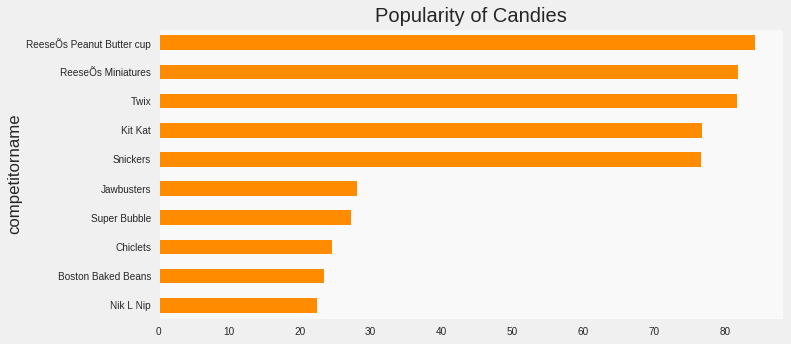

In [52]:
popularity = data[['competitorname','winpercent']].sort_values(by='winpercent')
fig = plt.figure();
ax = pd.concat([popularity.head(5),popularity.tail(5)],
          axis=0).plot(x='competitorname',y='winpercent',
                       kind='barh',title='Popularity of Candies',
                       sort_columns=True,figsize = (10,5),legend=False, color='#FF8C00');
ax.grid(b=None)
ax.set(facecolor='#f9f9f9')
fig.patch.set_facecolor('#f9f9f9')


In [0]:
data = data.set_index('competitorname')

In [0]:
data = data.sort_values(by='winpercent',ascending=False)

In [0]:
RK = range(1,len(data)+1)
popularity['RK'] = RK

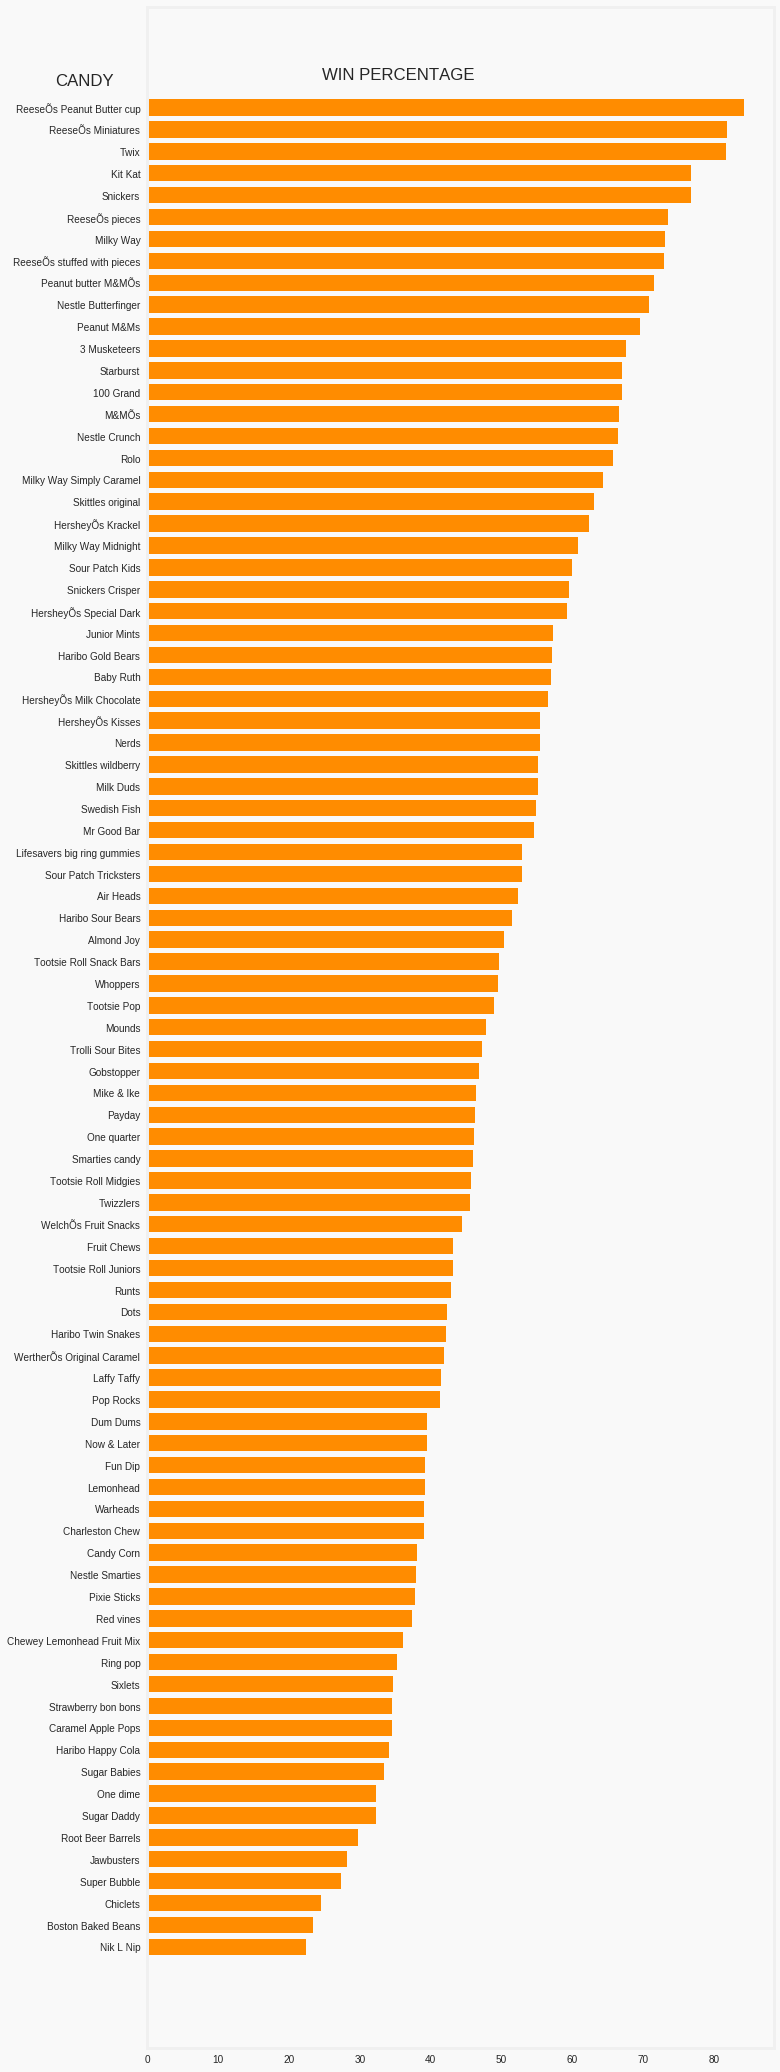

In [74]:
# I can't get the percentage in front of the bar 
# or just the straight lines across
y = data.index
x = data['winpercent']

fig, ax = plt.subplots()
width = 0.75
ind = np.arange(len(y))
ax.barh(y, x, width, align='center', color='#FF8C00')
ax.set(facecolor='#f9f9f9')
fig.patch.set_facecolor('#f9f9f9')
ax.invert_yaxis()
ax.figure.set_size_inches(10, 35)

ax.set_ylabel('CANDY').set_rotation(0)
ax.set_xlabel('WIN PERCENTAGE')
ax.yaxis.set_label_coords(-0.1,0.96)
ax.xaxis.set_label_coords(0.4,0.97)
ax.grid(b=None)